<a href="https://colab.research.google.com/github/seonae0223/machine_learning/blob/main/02_%EB%94%94%EC%A7%80%ED%84%B8_%EB%A7%88%EC%BC%80%ED%8C%85_%EC%B1%84%EB%84%90_%EA%B8%B0%EC%97%AC%EB%8F%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 디지털 마케팅이란
- 특정 목표를 위해 기업 또는 기업의 서비스, 제품, 브랜드 등을 ***온라인으로 고객에게 알리는 행위***
- 노출 ▶ 인지 ▶ 탐색 ▶ 전환/구매 ▶ 팬 ▶ 노출
  - 노출 : 광고가 노출됨에 따라 회사 또는 제품을 알림
  - 인지 : 노출된 광고를 통해 사용자가 회사 또는 제품을 사용자가 인지
  - 탐색 : 사용자가 인지한 회사 또는 제품을 사용자가 찾는 과정
  - 전환/구매 : 탐색된 제품이나, 인지 단계에 의해 사용자가 알게된 제품이 회사나 제품의 의도에 맞게 사용자가 행동.
    - 전환의 의미가 보통은 구매에 해당하나, 회사의 광고로 인해 사용자가 직접 구매 사이트까지 들어오는 것을 전환이라고도 이야기 한다.
  - 팬 : 전환/구매된 제품이 마음에 들어 사용자가 해당 제품의 팬이 되는 과정
    - 회사는 사용자의 구매를 목표로 광고를 하지만 구매를 하지 않은 사용자는 마케팅 비용이 더 들어가버린 사용자가 될 수 있기 때문에, 그 제품의 팬이 되는 것을 목표로 삼아야 한다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 디지털 마케팅의 종류
- 트위터, 인스타그램, 페이스북 등 SNS을 이용한 바이럴 마케팅이 대표적인 디지털 마케팅
- 이메일, SEO, Paid Search 등을 이용해 온라인상 디지털 마케팅을 하는 경우도 매우 많다.

## 용어 정리
- 광고 채널(Channel)
  - 인스타그램, 카카오톡, 네이버 검색
- 광고 캠페인(Campaign)
  - 채널 안에 여러 개의 광고를 만든다. 그 각각을 캠패인이라고 부른다.
- 노출(Impression)
  - 유저가 캠패인을 한 번이라도 봤다면, 노출되었다고 표현한다.
- 전환(Conversion)
  - 유저가 캠페인을 보고 우리가 원하는 행동을 했다면 ***전환***했다고 표현한다.
    - 일반적으로 구매를 의미한다.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
FILE_PATH="/content/drive/MyDrive/한경_토스뱅크_2024/01_Machine Learning/실습 프로젝트/디지털 마케팅 분석/data/attribution_data.csv"

df = pd.read_csv(FILE_PATH)
df.head()

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search


* Cookie: 브라우저를 이용해 사이트에 방문한 사용자들에게 부여된 랜덤한 쿠키의 ID
* Timestamp: 사이트에 방문한 시간(쿠키 기록 시간)
* Interaction: 사이트에 방문한 사용자에게 광고가 노출 되었는지, 전환 까지 이루어 졌는지에 대한 카테고리 변수
* Conversion: 0 : 실제 구매가 이루어지지 않음. 1 : 실제 구매가 이루어 졌음
* Conversion Value: 전환의 가치
* Channel: 마케팅에 대한 온라인 채널


User(쿠키) 별로 몇 개의 채널에 노출되었는지 확인
- ex) Insta, Insta, Facebook - 2개

In [ ]:
df_channels_per_cookie = df.groupby("cookie")["channel"].nunique().reset_index()
df_channels_per_cookie.head()

,cookie,channel
0,00000FkCnDfDDf0iC97iC703B,2
1,0000nACkD9nFkBBDECD3ki00E,1
2,0003EfE37E93D0BC03iBhBBhF,1
3,00073CFE3FoFCn70fBhB3kfon,1
4,00079hhBkDF3k3kDkiFi9EFAD,1


In [ ]:
# 채널 수 별 유저 수 확인
df_channels_per_cookie.groupby("channel").count()

,cookie
channel,
1,183020
2,45964
3,9549
4,1473
5,102


## 도메인 지식을 활용한 채널 기여도 분석
- 도메인 지식을 활용한다 = 우리가 기존에 알고 있는, 또는 기존에 잘 알려진 방법론을 사용해본다
- 어떤 채널이 전환에 대한 기여도가 높았는지 살펴보자

### Last Interaction Attribution Model
- 마지막으로 노출/클릭된 채널의 기여도를 100%로 계산

In [ ]:
TEST_USER = "00000FkCnDfDDf0iC97iC703B"
df.loc[df['cookie'] == TEST_USER]

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display


In [ ]:
df_last_interaction = df.drop_duplicates("cookie", keep='last')[["cookie", "channel", "conversion"]]
df_last_interaction.head(10)

,cookie,channel,conversion
3,00000FkCnDfDDf0iC97iC703B,Online Display,0
9,0000nACkD9nFkBBDECD3ki00E,Paid Search,0
14,0003EfE37E93D0BC03iBhBBhF,Paid Search,0
15,00073CFE3FoFCn70fBhB3kfon,Instagram,0
16,00079hhBkDF3k3kDkiFi9EFAD,Paid Search,0
20,0007iiAiFh3ifoo9Ehn3ABB0F,Instagram,0
21,0007o0nfoh9o79DDfD7DAiEnE,Facebook,0
22,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1
23,00090n9EBBEkA000C7Cik999D,Facebook,1
28,000A9AfDohfiBAFB0FDf3kDEE,Online Video,0


In [ ]:
# 전환된 경우만 확인
df_last_interaction_conv = df_last_interaction.loc[df_last_interaction['conversion'] == 1]
df_last_interaction_conv.head()

,cookie,channel,conversion
22,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1
23,00090n9EBBEkA000C7Cik999D,Facebook,1
83,000h3n9nC0hFhE3CCnkkAof7n,Facebook,1
109,000hCBnCB7oi7ADAEnEBCnBEE,Online Video,1
124,000kiDB3D0fCfDAohCDB3ohko,Facebook,1


In [ ]:
last_interaction_attrib = df_last_interaction_conv.groupby("channel")["cookie"].count().reset_index()
last_interaction_attrib = last_interaction_attrib.rename(
    columns={
        "cookie": "attribution"
    }
)
last_interaction_attrib

,channel,attribution
0,Facebook,5301
1,Instagram,2244
2,Online Display,2139
3,Online Video,3408
4,Paid Search,4547


### First Interaction Attribution Model
- 고객이 상호작용한(노출된) 첫 번째 채널이 전환에 100% 기여했다고 간주함

In [ ]:
df_first_interaction = df.drop_duplicates("cookie", keep='first')[["cookie", "channel", "conversion"]]
df_first_interaction.head(10)

,cookie,channel,conversion
0,00000FkCnDfDDf0iC97iC703B,Instagram,0
4,0000nACkD9nFkBBDECD3ki00E,Paid Search,0
10,0003EfE37E93D0BC03iBhBBhF,Paid Search,0
15,00073CFE3FoFCn70fBhB3kfon,Instagram,0
16,00079hhBkDF3k3kDkiFi9EFAD,Paid Search,0
17,0007iiAiFh3ifoo9Ehn3ABB0F,Instagram,0
21,0007o0nfoh9o79DDfD7DAiEnE,Facebook,0
22,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1
23,00090n9EBBEkA000C7Cik999D,Facebook,1
24,000A9AfDohfiBAFB0FDf3kDEE,Online Video,0


In [ ]:
df_first_interaction_conv = df_first_interaction[["cookie", "channel"]]
df_first_interaction_conv = df_first_interaction_conv.merge(df_last_interaction_conv[["cookie", "conversion"]], on="cookie")
df_first_interaction_conv.head()

,cookie,channel,conversion
0,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1
1,00090n9EBBEkA000C7Cik999D,Facebook,1
2,000h3n9nC0hFhE3CCnkkAof7n,Facebook,1
3,000hCBnCB7oi7ADAEnEBCnBEE,Online Video,1
4,000kiDB3D0fCfDAohCDB3ohko,Facebook,1


In [ ]:
first_interaction_attrib = df_first_interaction_conv.groupby('channel')['cookie'].count().reset_index()
first_interaction_attrib = first_interaction_attrib.rename(
    columns={
        "cookie": "attribution"
    }
)
first_interaction_attrib.head()

,channel,attribution
0,Facebook,5177
1,Instagram,2329
2,Online Display,2160
3,Online Video,3216
4,Paid Search,4757


### Linear Interaction Attribution Model
- 광고에 노출된 모든 채널의 기여도가 균등하다는 것을 가정
- 예를 들어 전환된 유저가 2개의 채널에 노출 되었다면 각 채널의 기여도가 0.5, 0.5씩 균등하게 계산

In [ ]:
# A라는 사람이 Instagram -> Facebook -> Instagram -> Video -> Paid -> Video
# 각 사용자 별로 채널별 데이터를 1벌씩 남기기
# 한 사용자가 하나의 채널에 여러 번 노출된 경우를 제거
df_unique_channel = df.drop_duplicates(['cookie', 'channel'], keep='last')[['cookie', 'channel']]
df_unique_channel.head()

,cookie,channel
0,00000FkCnDfDDf0iC97iC703B,Instagram
3,00000FkCnDfDDf0iC97iC703B,Online Display
9,0000nACkD9nFkBBDECD3ki00E,Paid Search
14,0003EfE37E93D0BC03iBhBBhF,Paid Search
15,00073CFE3FoFCn70fBhB3kfon,Instagram


In [ ]:
# 유저 아이디 별 노출된 채널의 개수. 나중에 기여도를 균등하게 나눌 때 사용
df_unique_channel_cnt = df_unique_channel.groupby("cookie").count().reset_index()
df_unique_channel_cnt = df_unique_channel_cnt.rename(
    columns={
        "channel": "channel_cnt"
    }
)
df_unique_channel_cnt.head()

,cookie,channel_cnt
0,00000FkCnDfDDf0iC97iC703B,2
1,0000nACkD9nFkBBDECD3ki00E,1
2,0003EfE37E93D0BC03iBhBBhF,1
3,00073CFE3FoFCn70fBhB3kfon,1
4,00079hhBkDF3k3kDkiFi9EFAD,1


In [ ]:
df_unique_channel_total = df_unique_channel.merge(df_unique_channel_cnt, on='cookie')
df_unique_channel_total.head()

,cookie,channel,channel_cnt
0,00000FkCnDfDDf0iC97iC703B,Instagram,2
1,00000FkCnDfDDf0iC97iC703B,Online Display,2
2,0000nACkD9nFkBBDECD3ki00E,Paid Search,1
3,0003EfE37E93D0BC03iBhBBhF,Paid Search,1
4,00073CFE3FoFCn70fBhB3kfon,Instagram,1


In [ ]:
# 마지막 채널과 merge
df_linear_interaction_conv = df_unique_channel_total.merge(df_last_interaction_conv[['cookie', 'conversion']], on='cookie')
df_linear_interaction_conv.head()

,cookie,channel,channel_cnt,conversion
0,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1,1
1,00090n9EBBEkA000C7Cik999D,Facebook,1,1
2,000h3n9nC0hFhE3CCnkkAof7n,Facebook,1,1
3,000hCBnCB7oi7ADAEnEBCnBEE,Instagram,2,1
4,000hCBnCB7oi7ADAEnEBCnBEE,Online Video,2,1


In [ ]:
# 기여도 계산
df_linear_interaction_conv['linear_attr'] = 1 / df_linear_interaction_conv['channel_cnt']
df_linear_interaction_conv.head()

,cookie,channel,channel_cnt,conversion,linear_attr
0,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1,1,1.0
1,00090n9EBBEkA000C7Cik999D,Facebook,1,1,1.0
2,000h3n9nC0hFhE3CCnkkAof7n,Facebook,1,1,1.0
3,000hCBnCB7oi7ADAEnEBCnBEE,Instagram,2,1,0.5
4,000hCBnCB7oi7ADAEnEBCnBEE,Online Video,2,1,0.5


In [ ]:
linear_interaction_attrib = df_linear_interaction_conv.groupby("channel")['linear_attr'].sum().reset_index()
linear_interaction_attrib = linear_interaction_attrib.rename(
    columns={
        "linear_attr": "attribution"
    }
)
linear_interaction_attrib.head()

,channel,attribution
0,Facebook,4947.600000
1,Instagram,2627.100000
2,Online Display,2143.600000
3,Online Video,3192.183333
4,Paid Search,4728.516667


# 시각화

In [ ]:
# 각 데이터 프레임을 동시에 시각화해서 비교하기 위해 카테고리를 부여
#   -> hue를 사용하기 위함.
last_interaction_attrib['method'] = "last"
first_interaction_attrib['method'] = "first"
linear_interaction_attrib['method'] = 'linear'

In [ ]:
first_interaction_attrib

,channel,attribution,method
0,Facebook,5177,first
1,Instagram,2329,first
2,Online Display,2160,first
3,Online Video,3216,first
4,Paid Search,4757,first


In [ ]:
# 데이터 통합
total_attrib = pd.concat([
    last_interaction_attrib,
    first_interaction_attrib,
    linear_interaction_attrib
], ignore_index=True)

total_attrib

,channel,attribution,method
0,Facebook,5301.000000,last
1,Instagram,2244.000000,last
2,Online Display,2139.000000,last
3,Online Video,3408.000000,last
4,Paid Search,4547.000000,last
5,Facebook,5177.000000,first
6,Instagram,2329.000000,first
7,Online Display,2160.000000,first
8,Online Video,3216.000000,first
9,Paid Search,4757.000000,first


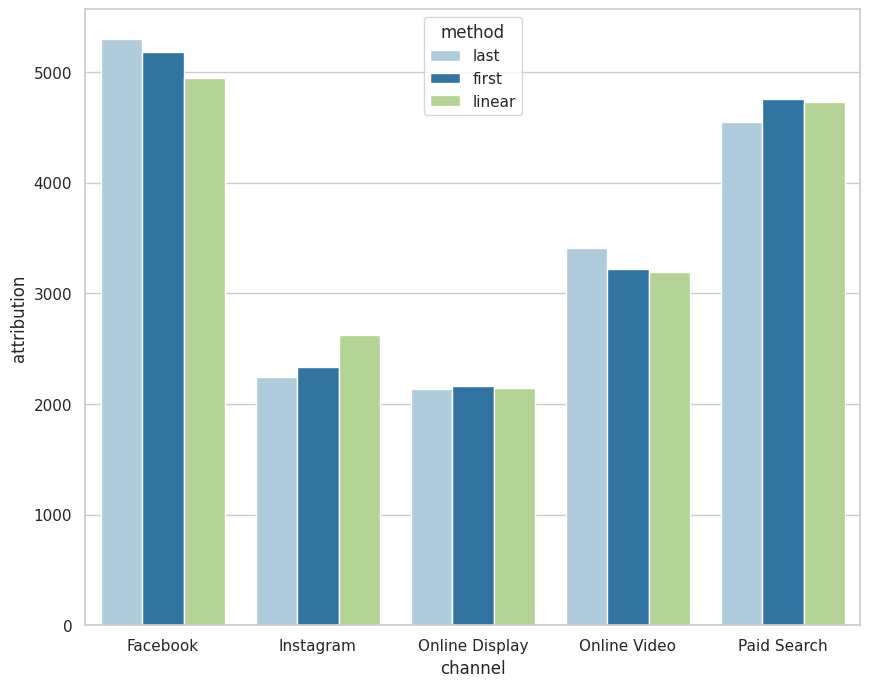

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.set_theme(style='whitegrid', palette='Paired')
sns.barplot(data=total_attrib, x='channel', y='attribution', hue='method')
plt.show()